# Smart Taxi using Q-Learning(Reinforcemnt learning)

Understand the Problem

You're training an agent (taxi) to:

    Pick up a passenger at one location.

    Drop them at a target location.

    Earn reward for success, lose reward for mistakes (like wrong drop or idle move).

You’ll use:

    Q-Learning (Model-free RL)

    Environment: Taxi-v3 from OpenAI Gym

In [1]:
import gymnasium as gym

# Create the environment with rendering enabled
env = gym.make("Taxi-v3", render_mode="ansi")  # or "human" for graphical popup
state, _ = env.reset()

# Show the grid in text mode
print(env.render())


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




💡 Render Modes:

    "ansi" → Outputs ASCII text (good for notebooks)

    "human" → Opens a separate pygame window

    "rgb_array" → For video recording or image analysis

🔍 Deep Explanation:
🎮 gym.make("Taxi-v3")

    This loads a prebuilt environment from OpenAI Gym.

    Taxi-v3 is a discrete environment with:

        A 5x5 grid

        4 pickup/dropoff locations (R, G, B, Y)

        A taxi that must pick up a passenger from one and drop at another

📦 state = env.reset()[0]

    This resets the environment to a random state.

    You get an integer state, like 123, not an image or coordinates.

    Internally, state is made of:

        Taxi row (5 options)
        Taxi column (5 options)

        Passenger location (5 options – 4 spots + in taxi)

        Destination (4 options)

    So:
    -> Total states=5×5×5×4=500


🧾 env.render()

    This shows the current grid, taxi position, passenger/destination.



✅ Step 4: Understand the MDP behind Taxi
🧠 Theory: Markov Decision Process (MDP)

The environment is defined by:

    S = Set of states (500 in Taxi-v3)

    A = Set of actions (6 total actions)

    R(s, a) = Reward function

    T(s, a, s') = Transition probability

    γ = Discount factor

In [2]:
print(env.action_space)

Discrete(6)


Means you have 6 actions:

| Action Number | Meaning |
| ------------- | ------- |
| 0             | South   |
| 1             | North   |
| 2             | East    |
| 3             | West    |
| 4             | Pickup  |
| 5             | Dropoff |


✅ Step 5: Q-Table Initialization

In [3]:
import numpy as np

# Create a 500x6 Q-table (states x actions)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

print("Shape of Q-table:", q_table.shape)


Shape of Q-table: (500, 6)


🔍 Deep Explanation:
📐 env.observation_space.n

    Returns number of states = 500

🎯 env.action_space.n

    Returns number of actions = 6

In [4]:
q_table = np.zeros([500, 6])


### ➤ Step 6: Set Hyperparameters and implement the Training Loop (Q-Learning Core)


In [5]:
import numpy as np
import random

# Learning rate - how much we update Q-value from new info
alpha = 0.7

# Discount factor - importance of future reward
gamma = 0.618

# Exploration factor - how often to choose a random action
epsilon = 1.0

# Decay rate for epsilon
epsilon_decay = 0.01

# Minimum value epsilon can decay to
min_epsilon = 0.1

# Number of episodes (each episode = one full pick-up & drop journey)
episodes = 10000


| Hyperparameter  | Meaning                                                        |
| --------------- | -------------------------------------------------------------- |
| `alpha (α)`     | Learning rate. High = learn fast; Low = trust old values more. |
| `gamma (γ)`     | Discount future rewards. High = plan long-term.                |
| `epsilon (ε)`   | Controls exploration vs exploitation. High = explore more.     |
| `episodes`      | How many full simulations (epochs) to train on                 |
| `epsilon_decay` | How fast ε reduces over time (we explore less over time)       |
| `min_epsilon`   | The smallest allowed ε (so we never completely stop exploring) |


#### 🔁 Step 6.2: Implement Q-Learning Training Loop

ogic Behind Training:

    For each episode:

        Reset the environment → get initial state

        Loop until done:

            Choose an action using ε-greedy

            Execute the action → get next_state, reward

            Update Q-value using Bellman Equation

            Transition to next_state

        At end of episode, reduce ε (so we explore less)

In [6]:
# Create the environment with no rendering during training (faster)
env = gym.make("Taxi-v3")

# Initialize Q-table: states x actions → 500 x 6
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Track rewards for analysis later
all_rewards = []

for episode in range(episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    while not done:
        # --- ε-greedy action selection ---
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore: random action
        else:
            action = np.argmax(q_table[state])  # Exploit: best known action

        # --- Take action and observe result ---
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # --- Q-value update using Bellman Equation ---
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])  # Best next Q-value

        # Bellman equation update
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Move to next state
        state = next_state
        total_reward += reward

    # After each episode, decay epsilon
    epsilon = max(min_epsilon, epsilon - epsilon_decay)

    all_rewards.append(total_reward)

    # Optional: log progress
    if (episode + 1) % 1000 == 0:
        avg = sum(all_rewards[-1000:]) / 1000
        print(f"Episode {episode + 1}: Avg Reward (last 1000) = {avg:.2f}, Epsilon = {epsilon:.3f}")


Episode 1000: Avg Reward (last 1000) = -51.34, Epsilon = 0.100
Episode 2000: Avg Reward (last 1000) = 1.29, Epsilon = 0.100
Episode 3000: Avg Reward (last 1000) = 2.79, Epsilon = 0.100
Episode 4000: Avg Reward (last 1000) = 2.47, Epsilon = 0.100
Episode 5000: Avg Reward (last 1000) = 2.83, Epsilon = 0.100
Episode 6000: Avg Reward (last 1000) = 2.37, Epsilon = 0.100
Episode 7000: Avg Reward (last 1000) = 1.98, Epsilon = 0.100
Episode 8000: Avg Reward (last 1000) = 2.40, Epsilon = 0.100
Episode 9000: Avg Reward (last 1000) = 2.28, Epsilon = 0.100
Episode 10000: Avg Reward (last 1000) = 2.22, Epsilon = 0.100


Q-Learning Math (Bellman):

You update Q-value like this:
$$
Q(s,a) = (1 - \alpha) Q(s,a) + \alpha \left[r + \gamma \cdot \max_a Q(s') \right]
$$
You're mixing:

    Old value (stability)

    New reward + best future estimate (learning)

Optional: Save the Q-table

At the end of training, save the Q-table for reuse:



In [7]:
np.save("q_table.npy", q_table)


### ✅ Step 7: Evaluate Agent Performance & Visualize Taxi Movement

Part 1: Test the Trained Agent

This helps us:

    See how well the agent performs using the learned Q-table

    Measure how often it completes the task efficiently

In [8]:
num_eval_episodes = 100
successful_episodes = 0
total_eval_reward = 0

for episode in range(num_eval_episodes):
    state, info = env.reset()
    done = False
    episode_reward = 0

    while not done:
        action = np.argmax(q_table[state])  # Always exploit during evaluation
        next_state, reward, terminated, truncated, info = env.step(action)
        state = next_state
        done = terminated or truncated
        episode_reward += reward

    total_eval_reward += episode_reward
    if episode_reward > 0:  # Reward is usually +20 for successful drop
        successful_episodes += 1

# Final evaluation metrics
avg_eval_reward = total_eval_reward / num_eval_episodes
print(f"✅ Evaluation Result:")
print(f"Average Reward: {avg_eval_reward}")
print(f"Successful Rides: {successful_episodes}/{num_eval_episodes}")


✅ Evaluation Result:
Average Reward: 8.11
Successful Rides: 100/100


🔍 What does this tell us?

    episode_reward: Total reward collected in a ride

    successful_episodes: Episodes where the taxi picked up and dropped the passenger correctly

    High success rate and high avg reward → good learning

🎥 Part 2: Visualize Taxi Agent in Action (1 Episode)

Let’s watch it work step-by-step!

In [9]:
# Create env with text rendering
env = gym.make("Taxi-v3", render_mode="ansi")
state, info = env.reset()
done = False

print("🚕 Initial State:")
print(env.render())

while not done:
    action = np.argmax(q_table[state])
    next_state, reward, terminated, truncated, info = env.step(action)
    state = next_state
    done = terminated or truncated

    print(f"\nAction: {action} | Reward: {reward}")
    print(env.render())


🚕 Initial State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Action: 4 | Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


Action: 0 | Reward: -1
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


Action: 2 | Reward: -1
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


Action: 0 | Reward: -1
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


Action: 2 | Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


Action: 2 | Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)


Action: 0 | Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)


Action: 0 | Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : 

2: Graphical window using render_mode="human"

In [10]:
env = gym.make("Taxi-v3", render_mode="human")
state, info = env.reset()
done = False

while not done:
    action = np.argmax(q_table[state])
    next_state, reward, terminated, truncated, info = env.step(action)
    state = next_state
    done = terminated or truncated
import time
time.sleep(0.5)  # Add inside the loop to slow down animation


### ✅ Step 8: Plotting Reward vs Episode

C:\Users\Udayg\AppData\Local\Temp\ipykernel_16520\3833096723.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\project\2025\ML\ML-miniProjects\virtualenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


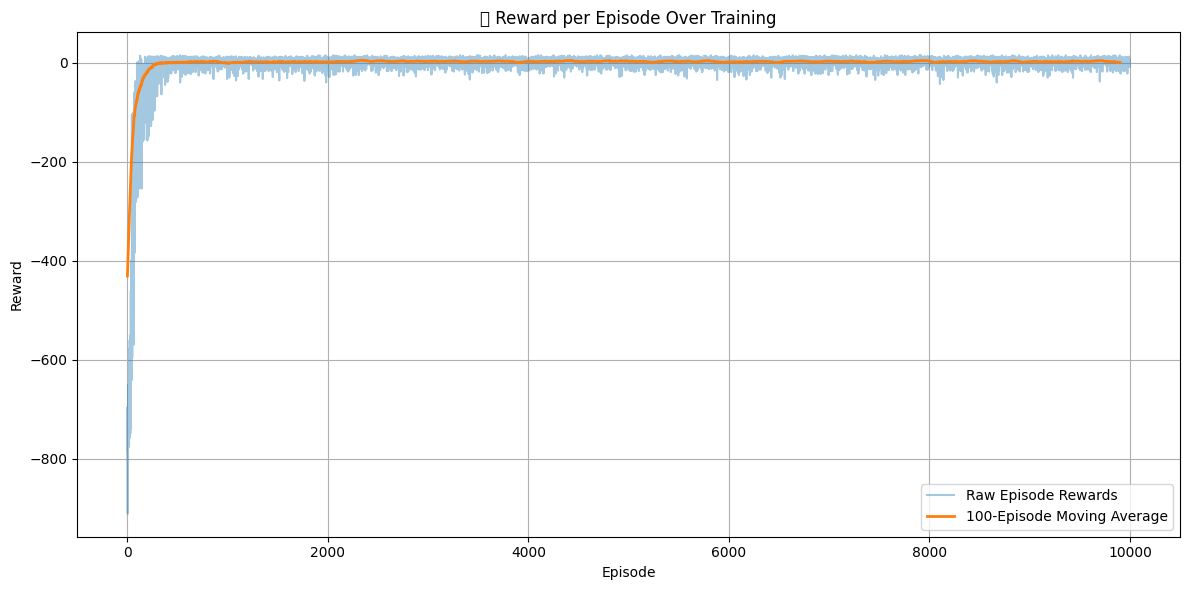

: 

In [ ]:
import matplotlib.pyplot as plt

# Smooth rewards using moving average (optional but cleaner)
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot original rewards
plt.figure(figsize=(12, 6))
plt.plot(all_rewards, label="Raw Episode Rewards", alpha=0.4)

# Plot moving average for smoothing
window = 100
smoothed_rewards = moving_average(all_rewards, window)
plt.plot(smoothed_rewards, label=f"{window}-Episode Moving Average", linewidth=2)

plt.title("📈 Reward per Episode Over Training")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
